In [1]:
### TASK 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [6]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scalered, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scalered, columns=X_test.columns)

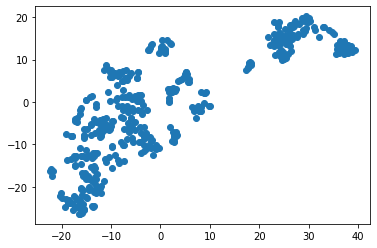

In [15]:
tsne = TSNE(learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [16]:
### TASK2

In [22]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = kmeans.fit_predict(X_train)
pd.value_counts(train_labels)

0    297
2     76
1     31
dtype: int64

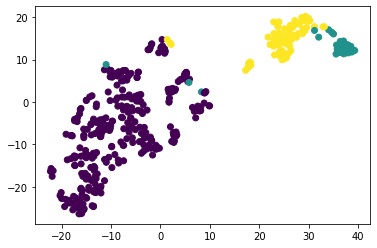

In [25]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=train_labels)
plt.show()

In [26]:
### почему то в 0 класстер попали точки из 3???????

In [30]:
for i in range(3):
    print(f'cluster #{i}: mean price = {y_train[train_labels==i].mean()}, mean CRIM = {X_train.loc[train_labels==i, "CRIM"].mean()}')
    print('--------------------------------------------------')

cluster #0: mean price = price    25.168687
dtype: float64, mean CRIM = 0.40486282828282844
--------------------------------------------------
cluster #1: mean price = price    13.196774
dtype: float64, mean CRIM = 14.360380322580648
--------------------------------------------------
cluster #2: mean price = price    17.442105
dtype: float64, mean CRIM = 11.745661842105266
--------------------------------------------------


In [ ]:
### TASK3

In [32]:
test_labels = kmeans.predict(X_test)
for i in range(3):
    print(f'cluster #{i}: mean price = {y_test[test_labels==i].mean()}, mean CRIM = {X_test.loc[test_labels==i, "CRIM"].mean()}')
    print('--------------------------------------------------')

cluster #0: mean price = price    23.911594
dtype: float64, mean CRIM = 0.2464211594202899
--------------------------------------------------
cluster #1: mean price = price    12.814286
dtype: float64, mean CRIM = 19.021665714285714
--------------------------------------------------
cluster #2: mean price = price    17.392308
dtype: float64, mean CRIM = 8.469301923076923
--------------------------------------------------
